In [ ]:
# ARIMA MODEL IMPLEMENTATION ON ENVIRONMENT DATASET

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [115]:
import pandas as pd
df = pd.read_csv("co2.csv")
print(df.head(20))

                Country  Year CO2EmissionRate (mt)
0           Afghanistan  2021                 8.35
1               Albania  2021                 4.59
2               Algeria  2021                  173
3                Angola  2021                24.45
4   Antigua and Barbuda  2021                 0.78
5             Argentina  2021                  189
6               Armenia  2021                 6.77
7                 Aruba  2021                 1.27
8             Australia  2021               367.91
9               Austria  2021                66.01
10           Azerbaijan  2021                37.11
11              Bahamas  2021                 4.04
12              Bahrain  2021                37.49
13           Bangladesh  2021               106.87
14             Barbados  2021                 1.77
15              Belarus  2021                58.36
16              Belgium  2021                95.92
17               Belize  2021                 0.64
18                Benin  2021  

In [116]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               5572 non-null   object
 1   Year                  5572 non-null   int64 
 2   CO2EmissionRate (mt)  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None


In [117]:
# Preprocess the data
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Convert to datetime format

# Check for duplicate values in the "Year" column
duplicate_years = df[df.duplicated(subset=['Year'], keep=False)]['Year']

df.set_index('Year', inplace=True)  # Set "Year" as the index
df['CO2EmissionRate (mt)'] = pd.to_numeric(df['CO2EmissionRate (mt)'], errors='coerce') 

In [118]:
df.tail(20)

,Country,CO2EmissionRate (mt)
Year,,
2018-01-01,Togo,0.4
2018-01-01,Tonga,1.1
2018-01-01,Trinidad and Tobago,26.2
2018-01-01,Tunisia,2.8
2018-01-01,Turkey,5.1
2018-01-01,Turkmenistan,14.4
2018-01-01,Turks and Caicos Islands,4.7
2018-01-01,Uganda,0.1
2018-01-01,Ukraine,4.5


In [119]:
# Drop rows with missing values
df.dropna(inplace=True)

In [120]:
df.head(5)

,Country,CO2EmissionRate (mt)
Year,,
2021-01-01,Afghanistan,8.35
2021-01-01,Albania,4.59
2021-01-01,Algeria,173.00
2021-01-01,Angola,24.45
2021-01-01,Antigua and Barbuda,0.78


In [121]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['CO2EmissionRate (mt)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check stationarity
if result[1] < 0.05:
    print('The data is likely stationary.')
else:
    print('The data is likely non-stationary.')

ADF Statistic: -7.229032256337726
p-value: 2.0172748058448107e-10
The data is likely stationary.


In [122]:
df.index = pd.to_datetime(df.index)

# Set frequency of the index to yearly
df.index.freq = pd.infer_freq(df.index)

# Define ARIMA parameters (p, d, q)
p = 1  # Autoregressive (AR) order
d = 1  # Differencing (I) order
q = 1  # Moving Average (MA) order

# Fit ARIMA model
model = ARIMA(df['CO2EmissionRate (mt)'], order=(p, d, q))
model_fit = model.fit()


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packa

In [123]:
# Forecast
forecast = model_fit.forecast(steps=10)  

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


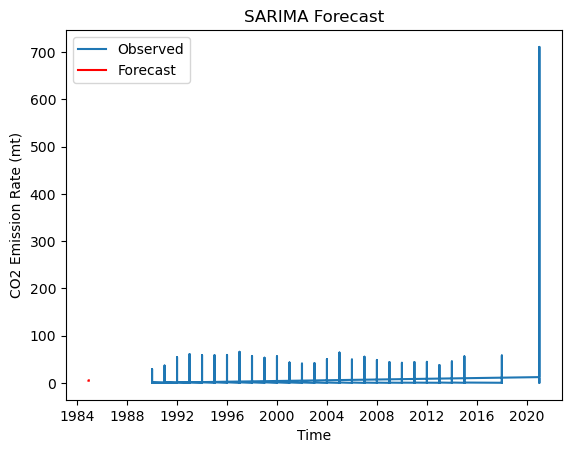

In [124]:
# Plot the forecasted values
plt.plot(df.index, df['CO2EmissionRate (mt)'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('CO2 Emission Rate (mt)')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


# SARIMA

In [126]:
# Define SARIMA parameters
order = (1, 1, 1)  # Non-seasonal parameters
seasonal_order = (1, 1, 1, 12)  # Seasonal parameters with period 12 (assuming monthly data)

In [127]:
# Fit SARIMA model
sarima_model = SARIMAX(df['CO2EmissionRate (mt)'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [130]:
# Forecast with SARIMA model
forecast = sarima_fit.get_forecast(steps=18) 

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


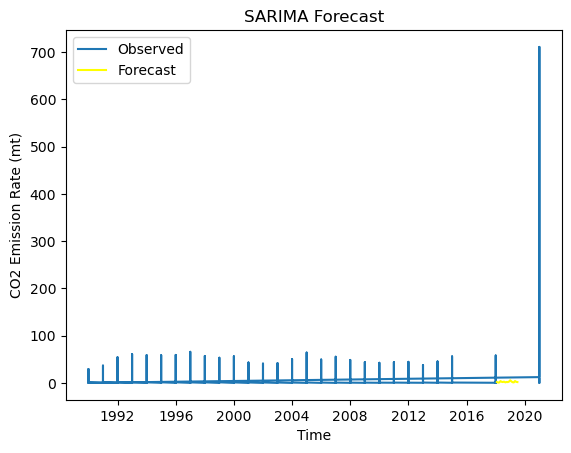

In [137]:
import matplotlib.pyplot as plt

# Plot observed data
plt.plot(df.index, df['CO2EmissionRate (mt)'], label='Observed')

# Plot forecasted values
forecast_values = forecast.predicted_mean  # Extract forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=len(forecast_values), freq='M')  # Adjust forecast index length

plt.plot(forecast_index, forecast_values, label='Forecast', color='yellow')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('CO2 Emission Rate (mt)')
plt.title('SARIMA Forecast')
plt.legend()

# Show plot
plt.show()
